In [9]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Exploration

In [10]:
df = pd.read_csv('BBC News Train.csv')
test_df = pd.read_csv('BBC News Test.csv')
print(df.describe())
print(df['Category'].value_counts())
print(test_df.shape)
print(df.shape)

         ArticleId
count  1490.000000
mean   1119.696644
std     641.826283
min       2.000000
25%     565.250000
50%    1112.500000
75%    1680.750000
max    2224.000000
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64
(735, 2)
(1490, 3)


In [11]:
# Get Nan Count
print(df.isna().sum())

ArticleId    0
Text         0
Category     0
dtype: int64


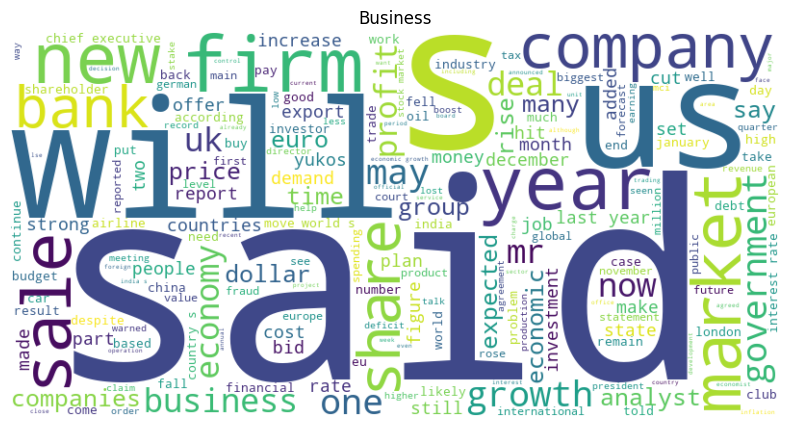

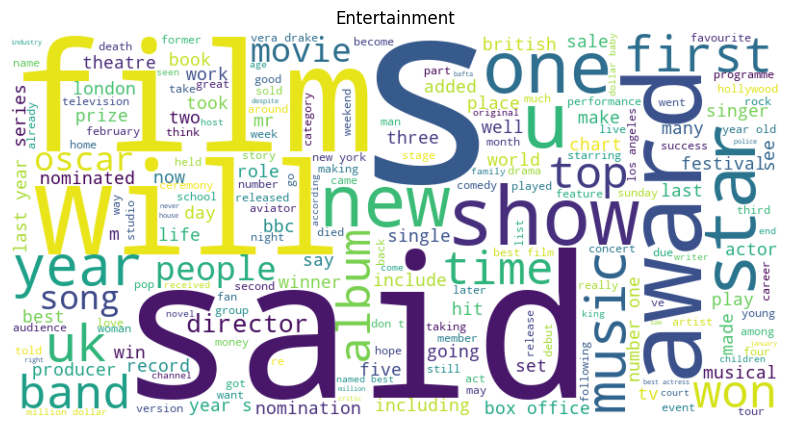

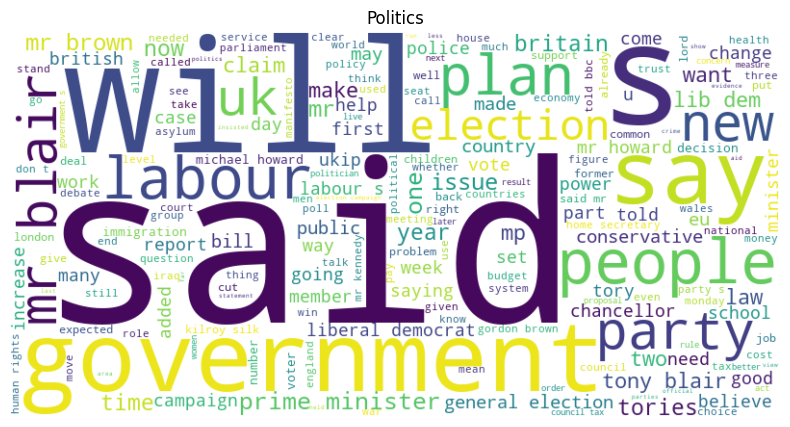

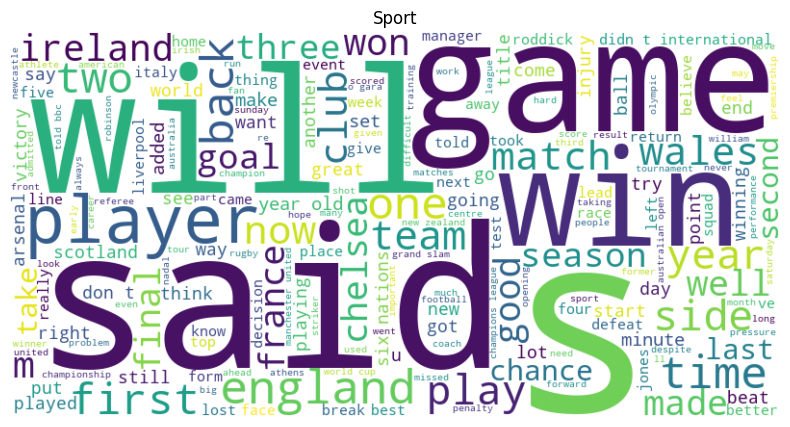

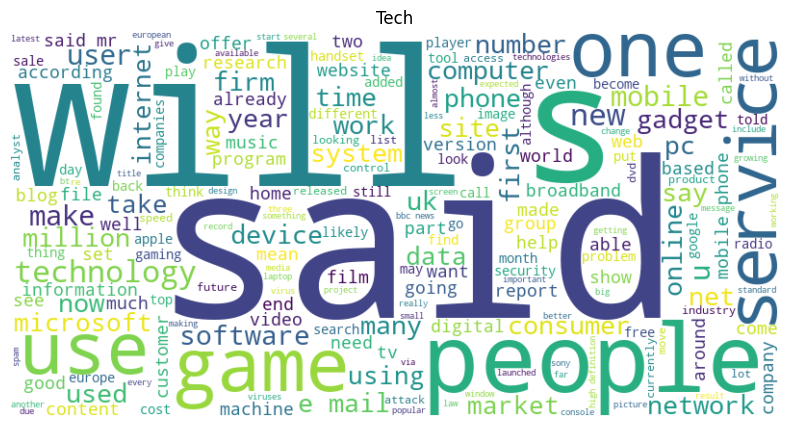

In [12]:
# Generate a word cloud for articles of each category
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(' '.join(df[df['Category'] == 'business']['Text']), 'Business')
generate_wordcloud(' '.join(df[df['Category'] == 'entertainment']['Text']), 'Entertainment')
generate_wordcloud(' '.join(df[df['Category'] == 'politics']['Text']), 'Politics')
generate_wordcloud(' '.join(df[df['Category'] == 'sport']['Text']), 'Sport')
generate_wordcloud(' '.join(df[df['Category'] == 'tech']['Text']), 'Tech')

Some of the common concerns I'd have about banks of text would be HTML or upper case letters being in the content but it looks pretty clean already.

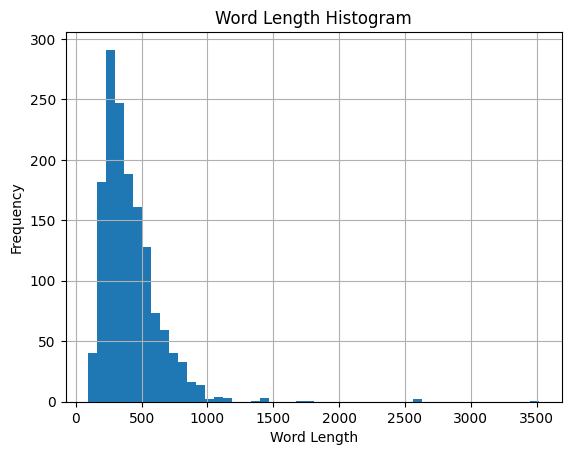

count    1490.000000
mean      414.042953
std       227.025845
min        94.000000
25%       269.000000
50%       361.500000
75%       508.000000
max      3519.000000
Name: word_length, dtype: float64


In [13]:
# Word Length Histogram of all articles
def word_length(text):
    return len (text.split(' '))

df['word_length'] = df['Text'].apply(word_length)
ax = df['word_length'].hist(bins=50)
ax.set_title('Word Length Histogram')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()
print(df['word_length'].describe())

In [14]:
# What a strange article
print(df[df['word_length'] < 100]['Text'].values)

['blunkett hints at election call ex-home secretary david blunkett has given fresh clues that the general election will be announced on monday.  he told bbc radio five live:  i m out in my constituency getting ready for what we presume will be an announcement very shortly at the weekend.  he clarified that he meant he would be in his sheffield seat this weekend  not that he expected an election call then. tony blair is tipped to ask the queen on monday to dissolve parliament ready for a 5 may poll.']


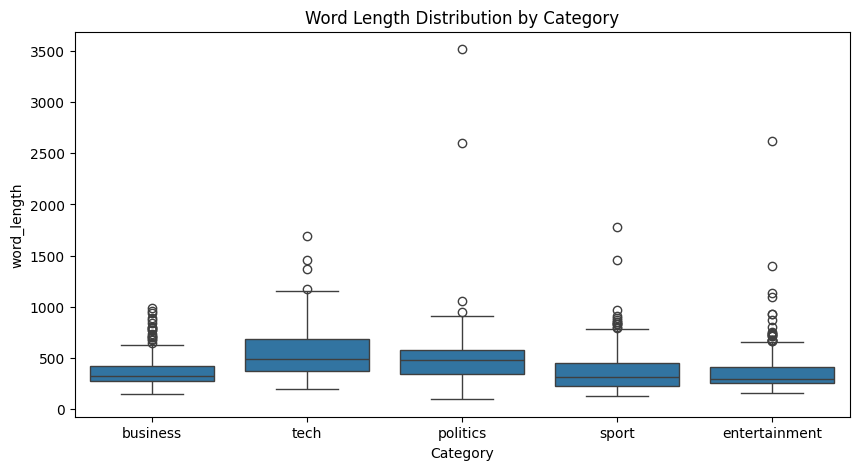

In [15]:
# Whisker plot of word length for each category
import seaborn as sns
def boxplot_word_length(df):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Category', y='word_length', data=df)
    plt.title('Word Length Distribution by Category')
    plt.show()
boxplot_word_length(df)

In [16]:
# Top bigram for each category
from sklearn.feature_extraction.text import CountVectorizer
bigrams = pd.DataFrame()

def top_bigrams(text, n=10):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    X = vectorizer.fit_transform([text])
    bigrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    return bigrams.sum().sort_values(ascending=False).head(n)

for category in df['Category'].unique():
    bigrams[category] = top_bigrams(' '.join(df[df['Category'] == category]['Text'])).index.to_list()

bigrams

,business,tech,politics,sport,entertainment
0,chief executive,said mr,mr blair,year old,box office
1,economic growth,mobile phone,prime minister,new zealand,new york
2,stock market,bbc news,mr brown,world cup,year old
3,analysts said,mobile phones,tony blair,grand slam,best film
4,mr glazer,told bbc,general election,champions league,won best
5,new york,high definition,mr howard,told bbc,named best
6,mr ebbers,news website,told bbc,australian open,los angeles
7,oil prices,mac mini,michael howard,manchester united,vera drake
8,deutsche boerse,wi fi,kilroy silk,second half,million dollar
9,consumer spending,anti virus,lib dems,davis cup,dollar baby


In [17]:
# Check tokens and hapaxes
# get all words for all articles
# tokenize it with nltk
# get top ten hapaxes

from nltk.tokenize import word_tokenize
from nltk import FreqDist
import nltk
nltk.download('punkt_tab')
def get_hapaxes(text):
    tokens = word_tokenize(text.lower())
    fdist = FreqDist(tokens)
    hapaxes = fdist.hapaxes()
    return hapaxes
all_text = ' '.join(df['Text'])
hapaxes = get_hapaxes(all_text)
print("Top 10 Hapaxes:", hapaxes[:10])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/joeharter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Top 10 Hapaxes: ['whistleblower', 'ex-head', 'orchestrated', 'ebber', 'munich-based', '97.5', 'dz', 'bernd', 'weidensteiner', 'wolfgang']
